## Iniciando com Pandas
[Fonte](https://medium.com/data-hackers/uma-introdu%C3%A7%C3%A3o-simples-ao-pandas-1e15eea37fa1)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
df = pd.DataFrame({'Aluno'    : ["Wilfred", "Abbie", "Harry", "Julia", "Carrie"],
                   'Faltas'   : [3,4,2,1,4],
                   'Prova'    : [2,7,5,10,6],
                   'Seminário': [8.5,7.5,9.0,7.5,8.0]})
df

,Aluno,Faltas,Prova,Seminário
0,Wilfred,3,2,8.5
1,Abbie,4,7,7.5
2,Harry,2,5,9.0
3,Julia,1,10,7.5
4,Carrie,4,6,8.0


In [7]:
# Visualizar os tipos
df.dtypes

Aluno         object
Faltas         int64
Prova          int64
Seminário    float64
dtype: object

In [8]:
# Visualizando as colunas.
df.columns

Index(['Aluno', 'Faltas', 'Prova', 'Seminário'], dtype='object')

In [9]:
# Acessando a coluna pelo nome.
df["Seminário"]

0    8.5
1    7.5
2    9.0
3    7.5
4    8.0
Name: Seminário, dtype: float64

In [10]:
# Breve resumo dos dados.
df.describe()

,Faltas,Prova,Seminário
count,5.00000,5.000000,5.00000
mean,2.80000,6.000000,8.10000
std,1.30384,2.915476,0.65192
min,1.00000,2.000000,7.50000
25%,2.00000,5.000000,7.50000
50%,3.00000,6.000000,8.00000
75%,4.00000,7.000000,8.50000
max,4.00000,10.000000,9.00000


In [11]:
# Ordenando pela coluna seminário.
df.sort_values(by="Seminário")

,Aluno,Faltas,Prova,Seminário
1,Abbie,4,7,7.5
3,Julia,1,10,7.5
4,Carrie,4,6,8.0
0,Wilfred,3,2,8.5
2,Harry,2,5,9.0


In [12]:
# Acessando pelo indice.
df.loc[3]

Aluno        Julia
Faltas           1
Prova           10
Seminário      7.5
Name: 3, dtype: object

In [13]:
# Alunos com seminário > 8.0
df[df["Seminário"] > 8.0]

,Aluno,Faltas,Prova,Seminário
0,Wilfred,3,2,8.5
2,Harry,2,5,9.0


In [14]:
# Usando o and condicional.
df[(df["Seminário"] > 8.0) & (df["Prova"] > 3)]

,Aluno,Faltas,Prova,Seminário
2,Harry,2,5,9.0


### Lendo Arquivo

In [15]:
df = pd.read_csv("dados.csv")

In [16]:
# Mostras as primeiras linhas.
df.head() # Podemos usar um limite: head(n=10).

,condominio,quartos,suites,vagas,area,bairro,preco,pm2
0,350,1,0.0,1.0,21,Botafogo,340000,16190.48
1,800,1,0.0,1.0,64,Botafogo,770000,12031.25
2,674,1,0.0,1.0,61,Botafogo,600000,9836.07
3,700,1,1.0,1.0,70,Botafogo,700000,10000.00
4,440,1,0.0,1.0,44,Botafogo,515000,11704.55


In [17]:
# Mostra as últimas linhas.
df.tail() # Podemos usar um limite: tail(n=10).

,condominio,quartos,suites,vagas,area,bairro,preco,pm2
1992,1080,3,1.0,1.0,80,Tijuca,680000,8500.00
1993,750,3,0.0,1.0,82,Tijuca,650000,7926.83
1994,700,3,1.0,1.0,100,Tijuca,629900,6299.00
1995,1850,3,1.0,2.0,166,Tijuca,1600000,9638.55
1996,800,3,1.0,1.0,107,Tijuca,540000,5046.73


In [18]:
df["bairro"].unique()

array(['Botafogo', 'Copacabana', 'Gávea', 'Grajaú', 'Ipanema', 'Leblon',
       'Tijuca'], dtype=object)

In [19]:
df["bairro"].value_counts() # Contando os apartamentos por bairro.

Copacabana    346
Tijuca        341
Botafogo      307
Ipanema       281
Leblon        280
Grajaú        237
Gávea         205
Name: bairro, dtype: int64

In [20]:
df["bairro"].value_counts(normalize=True) # Contados os apartamentos e transfomando em porcentagem.

Copacabana    0.173260
Tijuca        0.170756
Botafogo      0.153731
Ipanema       0.140711
Leblon        0.140210
Grajaú        0.118678
Gávea         0.102654
Name: bairro, dtype: float64

In [21]:
df.groupby("bairro").mean()

,condominio,quartos,suites,vagas,area,preco,pm2
bairro,,,,,,,
Botafogo,914.475570,2.107492,1.048860,1.159609,83.837134,1.010614e+06,12034.486189
Copacabana,991.861272,2.101156,1.034682,1.080925,101.855491,1.216344e+06,11965.298699
Grajaú,619.940928,2.097046,0.970464,1.130802,79.949367,4.788869e+05,6145.624473
Gávea,985.234146,2.058537,1.029268,1.200000,88.497561,1.454571e+06,16511.582780
Ipanema,1357.120996,2.181495,1.192171,1.220641,100.615658,2.033096e+06,19738.407794
Leblon,1260.010714,2.207143,1.064286,1.164286,91.832143,1.946193e+06,20761.351036
Tijuca,681.175953,2.131965,0.944282,1.143695,81.457478,5.750780e+05,7149.804985


In [22]:
df.groupby("bairro").mean()["pm2"].sort_values()

bairro
Grajaú         6145.624473
Tijuca         7149.804985
Copacabana    11965.298699
Botafogo      12034.486189
Gávea         16511.582780
Ipanema       19738.407794
Leblon        20761.351036
Name: pm2, dtype: float64

In [23]:
def truncar(bairro):
    return bairro[:3]

df["bairro"].apply(truncar).head()

0    Bot
1    Bot
2    Bot
3    Bot
4    Bot
Name: bairro, dtype: object

In [24]:
# Usando função lambda.
df["bairro"].apply(lambda x: x[:3]).head()

0    Bot
1    Bot
2    Bot
3    Bot
4    Bot
Name: bairro, dtype: object

#### Lidando com dados incompletos.

In [25]:
df2 = df.head()
df2 = df2.replace({"pm2": {12031.25: np.nan}})
df2

,condominio,quartos,suites,vagas,area,bairro,preco,pm2
0,350,1,0.0,1.0,21,Botafogo,340000,16190.48
1,800,1,0.0,1.0,64,Botafogo,770000,NaN
2,674,1,0.0,1.0,61,Botafogo,600000,9836.07
3,700,1,1.0,1.0,70,Botafogo,700000,10000.00
4,440,1,0.0,1.0,44,Botafogo,515000,11704.55


In [26]:
# Remove os NaN
df2.dropna()

,condominio,quartos,suites,vagas,area,bairro,preco,pm2
0,350,1,0.0,1.0,21,Botafogo,340000,16190.48
2,674,1,0.0,1.0,61,Botafogo,600000,9836.07
3,700,1,1.0,1.0,70,Botafogo,700000,10000.00
4,440,1,0.0,1.0,44,Botafogo,515000,11704.55


In [27]:
df2.fillna(99)

,condominio,quartos,suites,vagas,area,bairro,preco,pm2
0,350,1,0.0,1.0,21,Botafogo,340000,16190.48
1,800,1,0.0,1.0,64,Botafogo,770000,99.00
2,674,1,0.0,1.0,61,Botafogo,600000,9836.07
3,700,1,1.0,1.0,70,Botafogo,700000,10000.00
4,440,1,0.0,1.0,44,Botafogo,515000,11704.55


In [28]:
df2.isna()

,condominio,quartos,suites,vagas,area,bairro,preco,pm2
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


### Visualização de Dados

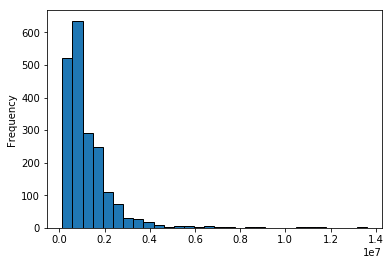

In [29]:
df["preco"].plot.hist(bins=30, edgecolor='black');

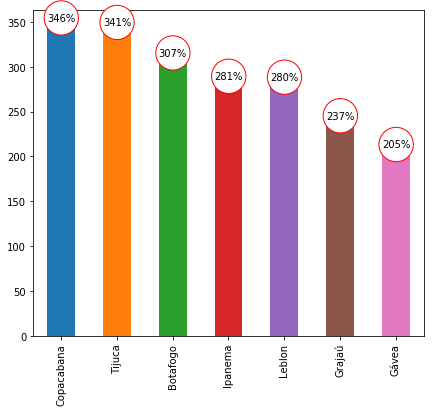

In [46]:
fig, ax = plt.subplots(figsize=(7,6))

bairo = df["bairro"].value_counts().plot.bar();

for p in bairo.patches:
    t = ax.annotate(str(p.get_height())+'%', (p.get_x(), p.get_height()+5))
    t.set(color='black', size=10)
    t.set_bbox(dict(facecolor='white', boxstyle='circle', lw=1, edgecolor='red'))
                    
# fig
# df["bairro"].value_counts().plot.bar();



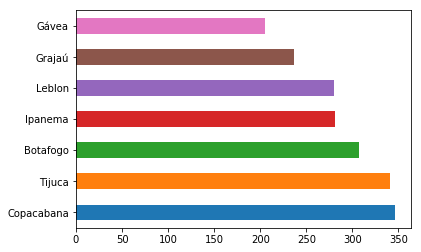

In [36]:
# Plotando na Orizontal
df["bairro"].value_counts().plot.barh();

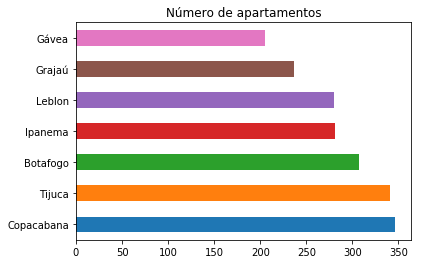

In [37]:
# Colocando legenda
df["bairro"].value_counts().plot.barh(title="Número de apartamentos");

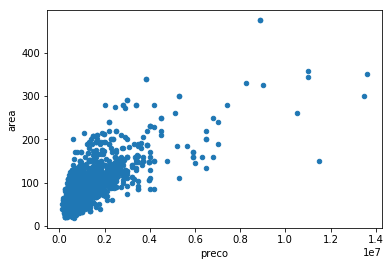

In [50]:
# Gráfico de dispersão.
df.plot.scatter(x='preco', y='area');

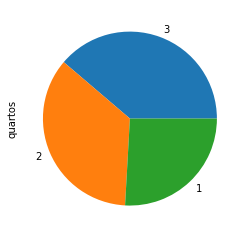

In [52]:
df["quartos"].value_counts().plot.pie();